#  FASHION_MNIST  DATASET

In [240]:
# THE MAIN GOAL OF THIS PROJECT IS TO CREATE A NEURAL NETWORK MODEL TO SUCCESSFULY PREDICT THE FASHION ITEM FROM THE GIVEN IMAGES

In [225]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [226]:
import tensorflow as tf     # ACTS AS A BACKEND FOR KERAS
import keras as kr    # IMPORTING KERAS FOR CREATION OF NEURAL NETWORKS

In [227]:
# IMPORTING DATASET AND SPLITTING IT INTO TRAIN TEST ARRAYS
(train_x,train_y),(test_x,test_y)=kr.datasets.fashion_mnist.load_data()

9

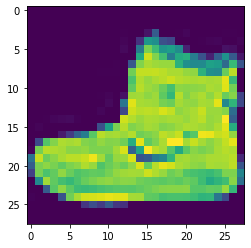

In [228]:
# HERE'S A SAMMPLE OF AN IMAGE ALONG WITH IT'S EXPECTED RESULT
plt.imshow(train_x[0])
train_y[0]

In [229]:
# ANALYZING SHAPE OF TRAINING DATA
print('shape of training features:',train_x.shape)
print('shape of training target:',train_y.shape)

shape of training features: (60000, 28, 28)
shape of training target: (60000,)


In [230]:
# ANALYZING SHAPE OF TESTING DATA
print('shape of training features:',test_x.shape)
print('shape of training target:',test_y.shape)

shape of training features: (10000, 28, 28)
shape of training target: (10000,)


In [231]:
# RESHAPING FEATURES 
train_x=train_x.reshape(60000,784)
test_x=test_x.reshape(10000,784)
train_x=kr.utils.normalize(train_x)
test_x=kr.utils.normalize(test_x)

In [232]:
# CHANGING THE FORM OF TARGET VALUES TO CATEGORICAL i.e( 09 = 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.)
ytrain=kr.utils.to_categorical(train_y)
ytest
ytrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [233]:
# CRAETING A NEURAL NETWORK
model=kr.models.Sequential()

In [234]:
# ADDING LAYERS TO OUR NEURAL NNETWORK
model.add(kr.layers.Dense(512,activation='relu',input_shape=(784,)))
model.add(kr.layers.Dense(512,activation='sigmoid'))
model.add(kr.layers.Dense(256,activation='relu'))
model.add(kr.layers.Dense(10,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [235]:
epochs=12
batch_size=64
model.fit(train_x,ytrain,epochs=epochs,batch_size=batch_size)

Epoch 1/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.6804 - accuracy: 0.7499
Epoch 2/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.4267 - accuracy: 0.8455
Epoch 3/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3768 - accuracy: 0.8625
Epoch 4/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3481 - accuracy: 0.8733
Epoch 5/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.3275 - accuracy: 0.8804
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3068 - accuracy: 0.8873
Epoch 7/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.2907 - accuracy: 0.8929
Epoch 8/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.2839 - accuracy: 0.8947
Epoch 9/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.2709 - accuracy: 0.8996
Epoch 10/12
60000/60000 [=====================

In [236]:
pred_values=model.predict(test_x)
pred_values[:5]

array([[3.77109814e-06, 1.96011679e-05, 1.05756094e-07, 3.32407296e-07,
        4.01704892e-09, 7.83656142e-04, 7.82735469e-07, 8.50944035e-03,
        3.12659893e-07, 9.90682006e-01],
       [8.90099443e-04, 7.68379095e-07, 9.62294936e-01, 3.50127848e-05,
        6.60966989e-03, 4.69640963e-06, 3.01496219e-02, 3.42694040e-10,
        1.53000074e-05, 4.61013583e-09],
       [1.87521698e-06, 9.99987125e-01, 1.18127437e-08, 2.22836661e-06,
        1.00860532e-07, 9.30906519e-10, 8.30539648e-06, 2.70367650e-07,
        3.39230488e-09, 3.67008379e-09],
       [1.89186622e-07, 9.99990344e-01, 2.71837797e-09, 5.38721360e-06,
        4.75033772e-08, 1.63798974e-10, 4.10906023e-06, 1.04316449e-08,
        5.43087963e-10, 6.49930387e-10],
       [1.11067586e-01, 1.36932322e-05, 2.28863750e-02, 3.42362351e-03,
        2.61318614e-03, 2.83715451e-07, 8.59203815e-01, 2.43129183e-09,
        7.91200844e-04, 1.62421912e-07]], dtype=float32)

In [237]:
# EVALUATING OUR MODEL WITH TEST VALUES
ytest=kr.utils.to_categorical(test_y)
model.evaluate(test_x,ytest)

10000/10000 [==============================] - 1s 97us/step


[0.3215261508822441, 0.8834999799728394]

In [238]:
# CONVERTING OUTPUT INTO INTEGER VALUES
pred=[]
for i in range(len(pred_values)):
    pred.append(np.where(pred_values[i]==np.amax(pred_values[i]))[0][0])  # GETS THE PREDICTED VALUE FROM PRED_VALUES ARRAY
pred=np.array(pred)

In [239]:
# FINDING HOW MANY VALUES HAVE BEEN PREDICTED CORRECTLY
np.unique(pred==test_y,return_counts=True)

(array([False,  True]), array([1165, 8835], dtype=int64))

as you can see we were able to correctly predict more than 88% of fashion items